In [ ]:
#A notebook for working on the kaggle MNIST digit recognition dataset

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [7]:
#read in all the data
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("digit-recognizer/test.csv")

Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1) #drop the label column

#free up space
del train

#g=sns.countplot(Y_train)
#Y_train.value_counts()

In [12]:
#check to see if any data is null
X_train.isnull().any().describe()
test.isnull().any().describe()

#nothing is null, proceed as followed

count       784
unique        1
top       False
freq        784
dtype: object

In [13]:
#normalize data --> convert to grayscale
X_train = X_train / 255.0
test = test / 255.0

#reshape data in 3 dimensions: height = 28px, width = 28px, depth = 1: 3D matrices to feed into Keras
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

#encode labels to vectors, so 2 is encoded as [0,0,1,0,0,0,0,0,0,0]
Y_train = to_categorical(Y_train,num_classes=10)

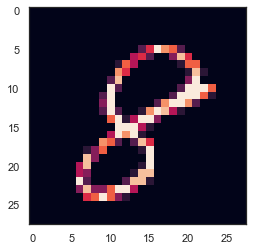

In [14]:
#split training and validation data
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=random_seed)

g=plt.imshow(X_train[0][:,:,0])


